In [1]:
!pip install fastai -q

In [2]:
from fastai.vision.all import *
import warnings
warnings.filterwarnings("ignore")

In [3]:
def remove_failed_images(path):
    """
    Removes any failed images from the given path.

    Args:
        path (str): The path to the dataset.

    Returns:
        None
    """
    # Check all images in the path
    fns = get_image_files(path)
    print(f"Total number of images: {len(fns)}")
    
    failed = verify_images(fns)
    print(f"Number of failed images: {len(failed)}")
    
    # Remove failed images
    for image_path in failed:
        print(f"Removing image: {image_path}")
        image_path.unlink()

remove_failed_images('image')

Total number of images: 4235
Number of failed images: 0


In [4]:
def classifier():
    """
    This function sets up a classifier using the fastai library.
    It defines the path to the dataset, creates a DataBlock, and creates a DataLoader.
    Returns:
        dls (DataLoaders): The DataLoader object containing the dataset.
    """
    # Define the path to your dataset
    path = Path('image')

    # Create a DataBlock
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   get_y=parent_label,
                   item_tfms=Resize(460),
                   batch_tfms=aug_transforms(size=224, min_scale=0.75))

    # Create a DataLoader
    dls = dblock.dataloaders(path)
    return dls


dls = classifier()


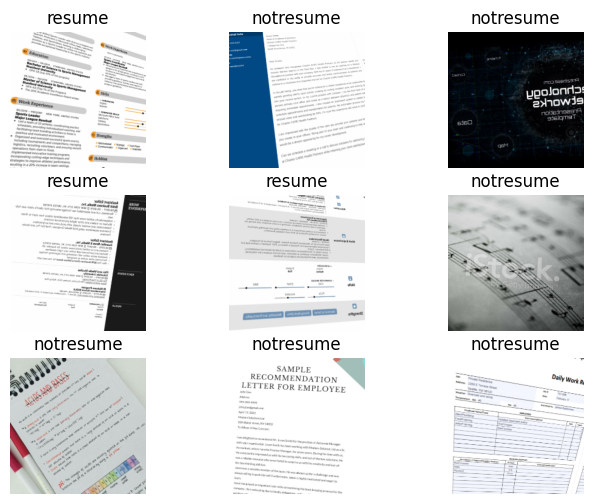

In [5]:
dls.show_batch(max_n=9, figsize=(8,6))

In [6]:
# Number of elements in the training set
num_train = len(dls.train_ds)

# Number of elements in the validation set
num_valid = len(dls.valid_ds)

print(f'Number of training images: {num_train}')
print(f'Number of validation images: {num_valid}')

Number of training images: 3388
Number of validation images: 847


epoch,train_loss,valid_loss,accuracy,time
0,46.885639,19.697060,0.650531,01:08


epoch,train_loss,valid_loss,accuracy,time
0,10.793847,1.357470,0.943329,01:07
1,4.644617,1.334745,0.953955,01:07


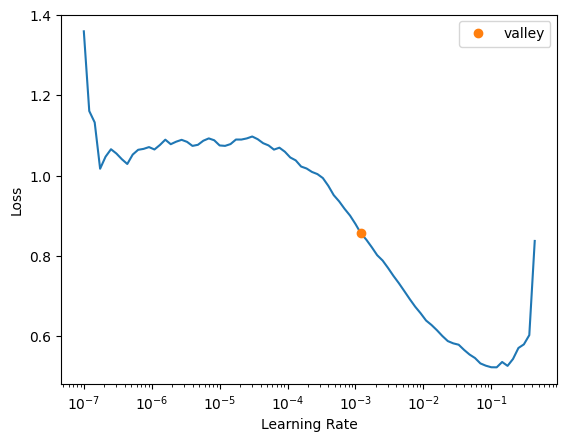

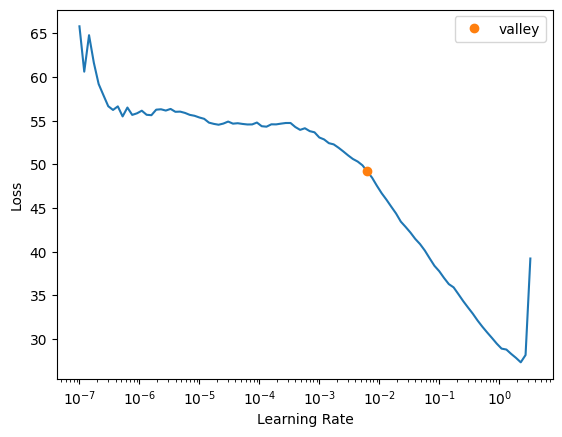

In [7]:

# Create a cnn_learner
learn = vision_learner(dls, resnet34, metrics=[accuracy])

# Find the learning rate
lr_min = learn.lr_find()

# Plot the learning rate finder
learn.lr_find(show_plot=True)

# Train the model
learn.fine_tune(2, base_lr=3e-3) 


Validation Loss: 1.069409966468811
Validation Accuracy: 0.9610389471054077


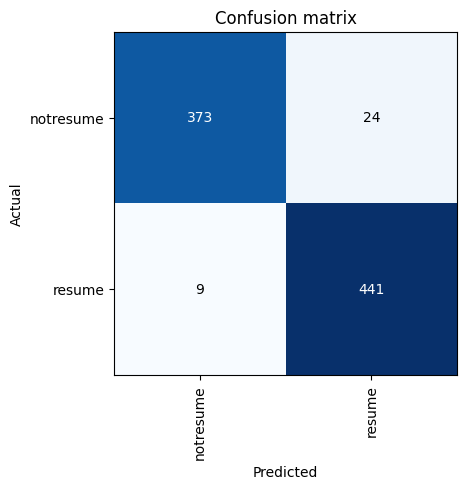

In [10]:
# Testing and Evaluation
# Validate the model on the validation set
val_loss, val_acc = learn.validate()

print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_acc}')

# Confusion Matrix
# Get the interpretation of the model
interp = ClassificationInterpretation.from_learner(learn)

# Plot the confusion matrix
interp.plot_confusion_matrix()



In [ ]:
learn.export('resume_classifier.pkl')
